# Read in the AF-snps results and calculate donor variants

## 1.1 Parameters

In [1]:
# cd34norm
# af_mean_f = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/AF_SNPs.csv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/"

# # chip_b1
# af_mean_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/AF_SNPs.csv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/"

# # chip_b2
# af_mean_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/AF_SNPs.csv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/"

# # chip_a1
# af_mean_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/AF_SNPs.csv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/"
af_mean_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/v01.sep2922.fiveDonors/multiplex/AF_SNPs.csv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/v01.sep2922.fiveDonors/multiplex/"

don_th=0.7
oth_th=0.1

## 1.2 Import packages

In [2]:
from os.path import join, exists, dirname
import os
from glob import glob
import mplh.cluster_help as ch
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

np.set_printoptions(formatter={'float': lambda x: format(x, '.3f')})

fig_utils from mplh


In [3]:
af_mean = pd.read_csv(af_mean_f)
af_mean

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,0.001350,0.000797,0.001350,0.000797,0.000797
1,0.982756,0.982756,0.982756,0.020291,0.020291
2,0.000139,0.000417,0.000417,0.000139,0.000417
3,0.002320,0.000633,0.000633,0.000633,0.002320
4,0.007093,0.968360,0.007093,0.007093,0.007093
...,...,...,...,...,...
283,0.008582,0.000354,0.000354,0.000354,0.000354
284,0.000139,0.000139,0.000139,0.000139,0.001419
285,0.000044,0.000044,0.000446,0.000446,0.000446
286,0.000612,0.000612,0.000612,0.000612,0.000612


## Calculate number of variants for each donor (>0.9, <0.2 in all others)

In [4]:
def is_don(col, df, don_th, oth_th):
    return len(df.loc[(df[col]>=don_th) & ((df.drop(col, axis=1)<=oth_th).all(axis=1))].index)
    
n_don_vars = pd.Series([is_don(c, af_mean, don_th, oth_th) for c in af_mean.columns], index=af_mean.columns)
n_don_vars.to_csv(join(outdir, "n_donor_vars.csv"))
n_don_vars

Cluster 0    23
Cluster 1    24
Cluster 2    28
Cluster 3     5
Cluster 4     2
dtype: int64

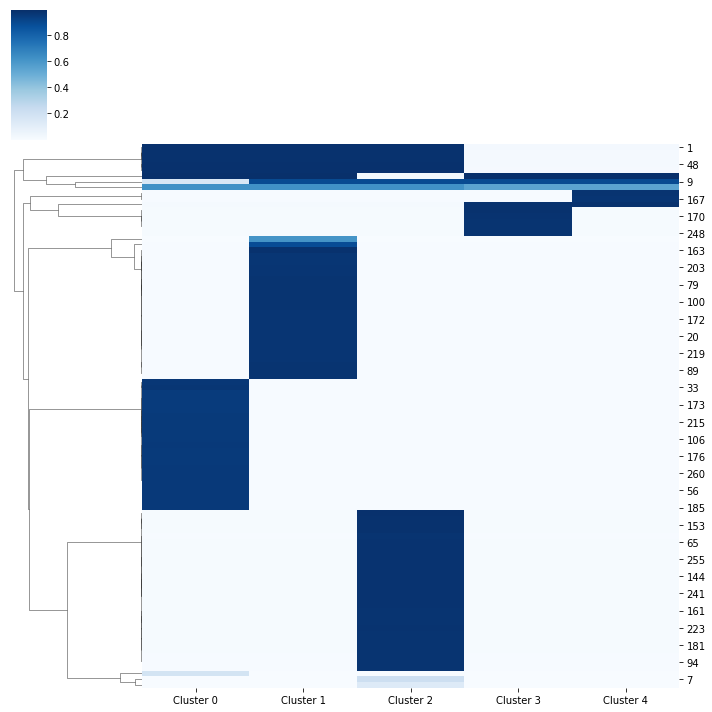

In [5]:
sns.clustermap(af_mean.loc[~(af_mean<0.1).all(axis=1)], col_cluster=False, cmap="Blues")
plt.savefig(join(outdir, "af_snps_mean.pdf"))

## Save heterozygous too (0.45)

In [6]:
n_don_vars = pd.Series([is_don(c, af_mean, don_th=0.45, oth_th=oth_th) for c in af_mean.columns], index=af_mean.columns)
n_don_vars.to_csv(join(outdir, "n_donor_vars_Het0.45.csv"))
n_don_vars

Cluster 0    23
Cluster 1    25
Cluster 2    28
Cluster 3     5
Cluster 4     2
dtype: int64